In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models 
from keras.utils import to_categorical  # Volver las variables categoricas 0 o 1
from keras.datasets import mnist

In [4]:
(train_data, train_labels),(test_data, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 25s 2us/step


In [9]:
train_data.shape

(60000, 28, 28)

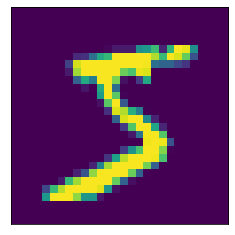

Label :  5


In [12]:
plt.imshow(train_data[0])
plt.xticks([])
plt.yticks([])
plt.show()

print('Label : ',str(train_labels[0]))

# Modelo

## Procesamiento de los datos

In [23]:
# Coloca las variables solo en dos dimensiones, para que sea más facil el procesamiento. Lo divido entre 255 para normalizarlo
X_train = train_data.reshape(60000, 28*28)/255
X_train = X_train.astype('float32')


X_test  = test_data.reshape(10000, 28*28)/255
X_test  = X_test.astype('float32')

In [24]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## Crear la red

In [28]:
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
model.add(layers.Dense(10, activation = 'softmax'))

In [29]:
# Compilarla
model.compile(
    optimizer='rmsprop',
    loss = 'categorical_crossentropy',
    metrics= 'accuracy'
)

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Entranar la red

In [33]:
model.fit(X_train, y_train, epochs=5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.4287 - accuracy: 0.8747
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1092 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0686 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0477 - accuracy: 0.9856
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0360 - accuracy: 0.9900


In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0658 - accuracy: 0.9794


[0.06576107442378998, 0.9793999791145325]